# Production Model

Here we are trying to train a model and export it for inference purpose.
We can use that model in a production enviroment. (via CPU)


In [2]:
from fastai2.vision.all import *
from utils import *

## Configure the Data Path

Change the following section as needed based your setup.

In [38]:
data_path = Path('../data')
synth_images_path = data_path/"synths"

## Bing Image Search

For this we are going to use Bing Image Search.
Which has a good FREE tier.

In [3]:
bing_image_search_key="06b8097bcdaa46b3b65312dbae563891"

In [5]:
result = search_images_bing(bing_image_search_key, 'Digitakt')

In [39]:
urls = result.attrgot('content_url')
dest = synth_images_path/"digitakt1.jpg"
download_url(urls[0], dest)

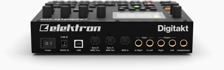

In [27]:
img = Image.open(dest)
img.to_thumb(224, 224)

## Download Images to Train

Here we are downloading some images for three types of synths I love.

In [28]:
synth_types = 'Digitakt', 'teenage engineering opz', 'Moog Grandmother'

In [40]:
if not synth_images_path.exists():
    synth_images_path.mkdir()
    for synth_type in synth_types:
        dest = (synth_images_path/synth_type)
        dest.mkdir(exist_ok=True)
        image_result = search_images_bing(bing_image_search_key, synth_type)
        download_images(dest, urls=image_result.attrgot('content_url'))

In [50]:
image_paths = get_image_files(synth_images_path)
image_paths

(#431) [Path('../data/synths/digitakt1.jpg'),Path('../data/synths/teenage engineering opz/00000062.jpg'),Path('../data/synths/teenage engineering opz/00000009.jpg'),Path('../data/synths/teenage engineering opz/00000130.jpg'),Path('../data/synths/teenage engineering opz/00000021.jpg'),Path('../data/synths/teenage engineering opz/00000090.jpg'),Path('../data/synths/teenage engineering opz/00000074.jpg'),Path('../data/synths/teenage engineering opz/00000028.jpg'),Path('../data/synths/teenage engineering opz/00000026.jpg'),Path('../data/synths/teenage engineering opz/00000056.jpg')...]

In [51]:
## We need to find out failed downloads and clean them.
## So, they don't affect our model
failed_downloads = verify_images(image_paths)
failed_downloads

(#0) []

In [52]:
failed_downloads.map(Path.unlink)

(#0) []

## Create Data Loaders from the Images

To train our model, we need to convert our images into the data loaders. For that, we use the `DataBlock` API.

In [78]:
synths_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [79]:
synths_dls = synths_db.dataloaders(synth_images_path)

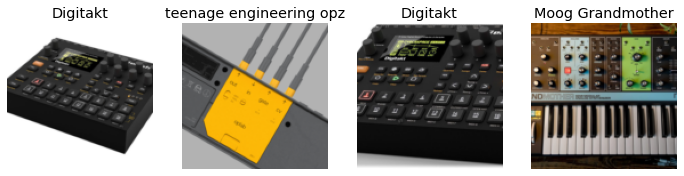

In [80]:
synths_dls.train.show_batch(max_n=4, nrows=1)

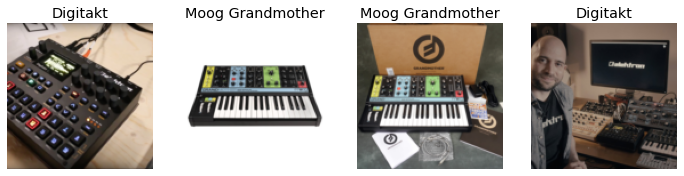

In [81]:
synths_dls.valid.show_batch(max_n=4, nrows=1)